### DESENVOLVENDO UM WORDCLOUD

In [154]:
# WordCloud -> biblioteca para criação de nuvem de palavras
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# matplotlib -> biblioteca para criação de gráficos
import matplotlib.pyplot as plt

# sns -> biblioteca para criação de gráficos
import seaborn as sns

# nlk -> biblioteca para tratar texto
import nltk 
from nltk.tokenize import word_tokenize

# pandas -> biblioteca para análise e manipulação de dados
import pandas as pd

# NumPy -> biblioteca para realizar operações em arrays multidimensionais
import numpy as np

# Image -> biblioteca para manipular Imagem
from PIL import Image

In [155]:
texto = '''
Python é uma linguagem fácil de aprender e poderosa. Ela tem estruturas de dados de alto nível eficientes e uma abordagem simples mas efetiva de programação orientada a objetos. A elegância de sintaxe e a tipagem dinâmica de Python aliadas com sua natureza interpretativa, o fazem a linguagem ideal para programas e desenvolvimento de aplicações rápidas em diversas áreas e na maioria das plataformas.
O interpretador Python e a extensiva biblioteca padrão estão disponíveis gratuitamente em código ou na forma binária para todas as maiores plataformas no endereço eletrônico do Python, https://www.python.org/, e pode ser livremente distribuído. O mesmo endereço contém distribuições de diversos módulos, programas e ferramentas gratuitos produzidos por terceiros e documentação adicional.
O interpretador Python pode ser facilmente estendido com novas funções e tipos de dados implementados em C ou C++ (ou outras linguagens chamadas a partir de C). Python também é adequada como uma linguagem de extensão para aplicações personalizáveis.
Este tutorial introduz informalmente o leitor aos conceitos básicos e aos recursos da linguagem e do sistema Python. É mais fácil se você possuir um interpretador Python para uma experiência prática, mas os exemplos são autossuficientes e, portanto, o tutorial pode apenas ser lido off-line também.
Para uma descrição detalhada dos módulos e objetos padrões, veja A Biblioteca Padrão do Python. Em A Referência da Linguagem Python você encontra uma definição mais formal da linguagem. Para escrever extensões em C ou C++ leia Estendendo e Incorporando o Interpretador Python e Manual de referência da API Python/C. Existe também uma série de livros que cobrem Python em profundidade.
Este tutorial não espera ser abrangente e cobrir todos os recursos ou mesmo os recursos mais usados. Ele busca introduzir diversos dos recursos mais notáveis do Python e lhe dará uma boa ideia do sabor e estilo da linguagem. Depois de lê-lo, você terá condições de ler e escrever programas e módulos Python e estará pronto para aprender mais sobre os diversos módulos descritos em A Biblioteca Padrão do Python.

'''

In [156]:
# Convertendo o texto para minusculo
# upper() -> converte cada palavra para maiusculo
# lower() -> converte cada palavra em minusculo
texto_lower = texto.lower()

In [157]:
# Configurando a núvem de palavras
# generate() é o método que recebe como parametro a variável texto
# para gerar a núvem de palavras
wordcloud = WordCloud(background_color='black',
                      width=1600, height=800).generate(texto_lower)

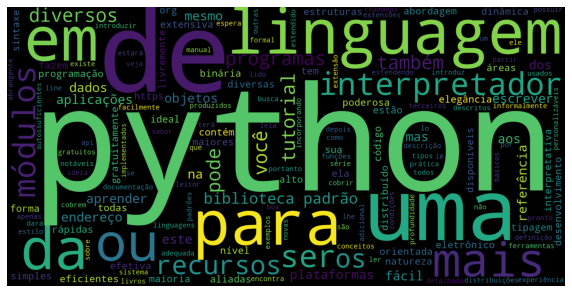

In [158]:
# Gerando a núvem de palavras com todas as palavras 
# e plotando com matplotlib
fig, ax = plt.subplots(figsize=(10, 7))
ax.imshow(wordcloud)
ax.set_axis_off()

plt.show(wordcloud)

In [159]:
# nltk permite tokenizar textos
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [160]:
# Exibe algumas stopwords do idioma brasileiro
stopwords = nltk.corpus.stopwords.words('portuguese')

In [161]:
# mais stopwords
stopwords_texto = ['é', 'uma', 'de', 'e', '.', 'de', '.', 'tem', 'uma', 'mas', 
                   'a', 'com', 'sua', ',', 'o', 'em', 'na',' /', '(', ')', 'ou', 
                   'fazem', 'cobrem', 'pode', 'estará', 'espera', 'www', 'https', 
                   'veja', 'org', 'lê-lo', 'todas', 'usados', 'ser', 'portando', 
                   'pronto', 'boa', 'partir', 'contém', 'sobre', 'dará', 'todos', 
                   'busca', ':', '//www.python.org/', 'possuir', 'lido', 'introduz', 
                   'introduzir', 'adequada', 'existe', 'apenas']

In [162]:
# Adicionando mais stopwords
# Caso a stopword exista, não faça nada
for sw in stopwords_texto:
  if sw in stopwords:
    pass
  else:
    stopwords.append(sw)

In [ ]:
stopwords

In [164]:
# Armazendo cada palavra/letra em uma posição do array
palavras = word_tokenize(texto_lower)

In [ ]:
palavras

In [166]:
# Adiciona as palavras que NÃO são STOPWORDS na lista palavras_nao_stopwords
# a lista 'palavras' recebe a lista palavras_nao_stopwords
palavras_nao_stopwords = []
for palavra in palavras:
  if palavra not in stopwords:
    palavras_nao_stopwords.append(palavra)
palavras = palavras_nao_stopwords

In [ ]:
palavras

In [168]:
# Gerar uma imagem atráves do wordcloud
python_mask = np.array(Image.open("/content/python.jpg"))

In [176]:
wordcloud = WordCloud(stopwords=stopwords,
                      mask=python_mask,
                      background_color='white',
                      width=1600, height=800).generate(' '.join(palavras))

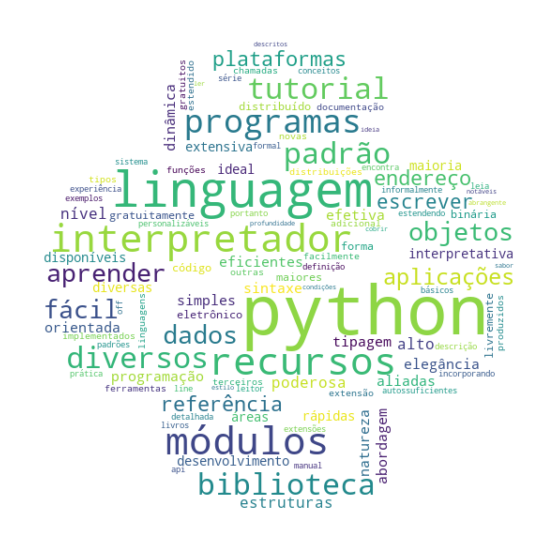

In [177]:
# Nova núvem de palavras sem as stopwords
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.show(wordcloud)

# Salvar a imagem
wordcloud.to_file("wc_python.png")

In [171]:
df_palavras = pd.DataFrame(palavras)

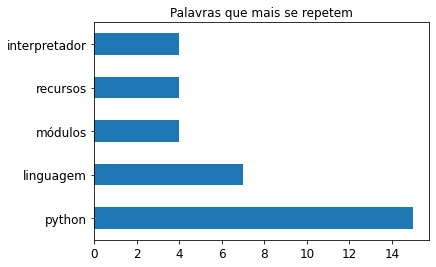

In [172]:
df_palavras[0].value_counts()[:5].plot(kind='barh', title="Palavras que mais se repetem", fontsize=12)

In [173]:
#data['title'].value_counts()[:20].plot(kind='barh')

In [174]:
#qtd_palavras = df_palavras.value_counts()

In [175]:
#sns.barplot(x=qtd_palavras, y=qtd_palavras.values, data=df_palavras)